- Todos os arquivos CSV possuem cabeçalho com o nome das colunas e campos separados por vírgula “,”.
- Coloque a resposta final de cada questão com **dois dígitos após a vírgula.**
- **seed 42**

In [147]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import Ridge
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
import scipy.stats as sp

In [145]:
np.set_printoptions(precision=2,suppress=True)

In [27]:
pd.__version__

'0.23.1'

In [28]:
root = "/home/felipe/python-sandbox/python3/notebooks/test/"

### q1

In [25]:
df_agrup_q1 = pd.read_csv(root+"agrupamento_Q1.csv")
df_agrup_q1.head()

,X1,X2,X3,X4
0,-0.075701,0.470857,0.133139,-0.152900
1,-0.328561,0.427323,-0.181237,-0.173041
2,-0.470727,-0.150515,0.000954,0.070937
3,-0.280037,-0.250587,-0.216587,-0.372430
4,-0.139359,-0.124966,0.081284,0.083914


In [38]:
X = df_agrup_q1.values
X.shape

(1000, 4)

In [41]:
df_agrup_centroides_q1 = pd.read_csv(root+"agrup_centroides_Q1.csv")
df_agrup_centroides_q1.head()

,Unnamed: 0,X1,X2,X3,X4
0,1,1.488531,-0.430586,0.208942,0.018485
1,2,0.149391,1.549535,0.219688,0.917854
2,3,1.276714,0.844500,1.211906,-0.494781
3,4,-0.224172,-0.265252,1.004367,-0.209741
4,5,0.059576,0.946101,1.114006,0.401051


In [63]:
centroids = df_agrup_centroides_q1.values[:,1:]
centroids.shape

(12, 4)

In [65]:
kmeans = KMeans(n_clusters=5, random_state=42, init=centroids[:5,:],max_iter=10,n_init=1).fit(X)
print(kmeans.cluster_centers_)

[[ 1.01  0.01 -0.01  0.03]
 [ 1.    0.   -0.01  1.  ]
 [ 1.    0.01  1.    0.  ]
 [-0.03  0.02  0.01 -0.02]
 [ 0.99  0.99  0.97 -0.  ]]


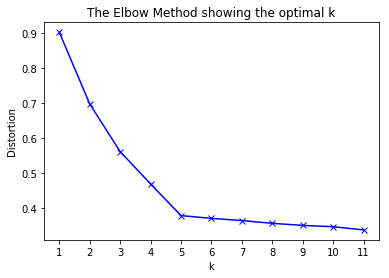

In [66]:
plt.clf()

colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,12)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42, init=centroids[:k,:],max_iter=10,n_init=1).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.xticks(np.arange(1,12,1))
plt.show()

### q2

### q3

In [31]:
df_classif_q3 = pd.read_csv(root+"classificacao_Q3.csv")
df_classif_q3.head()

,Genero,Idade,Escolaridade,Profissao,Target
0,F,a - Ate 25 anos,Fundamental,b,0
1,M,a - Ate 25 anos,Medio,d,1
2,F,c - 36 a 45 anos,Fundamental,a,1
3,M,d - 46 a 55 anos,Fundamental,a,0
4,F,c - 36 a 45 anos,Fundamental,b,1


In [67]:
df_classif_q3['Genero'].astype('category').describe()

count     1000
unique       2
top          F
freq       583
Name: Genero, dtype: object

In [68]:
df_classif_q3['Idade'].astype('category').describe()

count                 1000
unique                   5
top       b - 26 a 35 anos
freq                   297
Name: Idade, dtype: object

In [69]:
df_classif_q3['Escolaridade'].astype('category').describe()

count            1000
unique              4
top       Fundamental
freq              501
Name: Escolaridade, dtype: object

In [70]:
df_classif_q3['Profissao'].astype('category').describe()

count     1000
unique       5
top          b
freq       423
Name: Profissao, dtype: object

In [71]:
df_classif_q3_ohe = df_classif_q3.copy()

In [72]:
df_classif_q3_ohe = pd.concat([
    df_classif_q3_ohe,pd.get_dummies(df_classif_q3_ohe['Genero'], prefix='Genero')
],axis=1).drop(['Genero'],axis=1)

In [73]:
df_classif_q3_ohe = pd.concat([
    df_classif_q3_ohe,pd.get_dummies(df_classif_q3_ohe['Idade'], prefix='Idade')
],axis=1).drop(['Idade'],axis=1)

In [74]:
df_classif_q3_ohe = pd.concat([
    df_classif_q3_ohe,pd.get_dummies(df_classif_q3_ohe['Escolaridade'], prefix='Escolaridade')
],axis=1).drop(['Escolaridade'],axis=1)

In [75]:
df_classif_q3_ohe = pd.concat([
    df_classif_q3_ohe,pd.get_dummies(df_classif_q3_ohe['Profissao'], prefix='Profissao')
],axis=1).drop(['Profissao'],axis=1)

In [76]:
df_classif_q3_ohe.head()

,Target,Genero_F,Genero_M,Idade_a - Ate 25 anos,Idade_b - 26 a 35 anos,Idade_c - 36 a 45 anos,Idade_d - 46 a 55 anos,Idade_e - Mais 56 anos,Escolaridade_Fundamental,Escolaridade_Medio,Escolaridade_Pos-graduacao,Escolaridade_Superior,Profissao_a,Profissao_b,Profissao_c,Profissao_d,Profissao_e
0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
1,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0
4,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


In [95]:
df_classif_q3_ohe['Target'].mean()

0.772

In [80]:
len(df_classif_q3_ohe)

1000

In [83]:
X_train = df_classif_q3_ohe.drop(['Target'],axis=1).values[:500,:]
X_test = df_classif_q3_ohe.drop(['Target'],axis=1).values[500:,:]
y_train = df_classif_q3_ohe[['Target']].values[:500,:]
y_test = df_classif_q3_ohe[['Target']].values[500:,:]

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((500, 16), (500, 16), (500, 1), (500, 1))

In [85]:
clf = GaussianNB()
clf.fit(X_train,y_train.ravel())

GaussianNB(priors=None)

In [93]:
preds_train = clf.predict(X_train)
metrics.accuracy_score(y_train,preds_train)

0.604

In [94]:
preds_test = clf.predict(X_test)
metrics.accuracy_score(y_test,preds_test)

0.546

### q4

In [32]:
df_classif_q4 = pd.read_csv(root+"classificacao_Q4.csv")
df_classif_q4.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,target
0,1.696199,-0.792598,-0.349427,-0.464560,3.187014,0.035976,1.033274,-1.504968,0.204693,1.691204,...,1.488142,-0.686337,2.084970,-0.685140,-2.049451,2.015426,1.158477,-0.309441,-1.549833,4.0
1,-0.236696,-2.202342,0.024023,1.497700,-0.069758,-2.467088,1.126529,-0.570557,2.079251,-1.882632,...,0.405567,0.509564,1.374071,-0.016943,-0.429280,-0.895016,1.259566,-0.354139,0.806797,5.0
2,-0.436683,1.563816,-0.895999,-0.580425,0.311060,-0.187369,0.805249,-2.399522,-0.578818,1.586981,...,0.933578,-1.285978,0.503162,0.204829,-0.753835,0.290033,1.721487,1.304518,0.478903,3.0
3,1.425908,0.400055,-0.305038,-0.930251,-2.214549,1.763379,-0.239868,-2.058891,-1.006533,-2.156839,...,-0.849927,1.402768,0.393653,-1.466818,0.152257,-4.004950,0.676342,-1.927319,1.959032,8.0
4,-0.186156,-0.975764,0.594660,-1.181980,-1.443414,-0.797651,-1.252608,-0.060452,0.130702,-2.343517,...,-1.444435,-1.818126,0.446574,0.239328,0.802939,-2.035289,-1.433793,-0.218596,0.619317,9.0


In [107]:
len(df_classif_q4)

1500

In [101]:
data = df_classif_q4.drop(['target'],axis=1).values
target = df_classif_q4['target'].values

In [140]:
accs=[]

kf = KFold(n_splits=10)

for train_index, test_index in kf.split(data):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = target[train_index], target[test_index]

    knn = KNeighborsClassifier(n_neighbors=15,metric='euclidean')
    knn.fit(X_train,y_train)
    
    preds = knn.predict(X_test)
    
    acc = metrics.accuracy_score(y_test,preds)
    accs.append(acc)
    print(acc)

np.mean(accs)

0.6866666666666666
0.66
0.62
0.6533333333333333
0.6466666666666666
0.6666666666666666
0.6466666666666666
0.6533333333333333
0.68
0.6066666666666667


0.6519999999999999

### q5

### q6

In [33]:
df_regr_q6 = pd.read_csv(root+"regressao_Q6.csv")
df_regr_q6.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,target
0,-0.351837,0.719462,0.862522,-1.131049,0.744903,0.532177,1.595572,0.607174,1.306696,0.450022,170.471696
1,-0.309565,0.786033,1.175365,-1.149287,0.318301,0.620987,1.470917,0.568968,1.334661,-0.267235,151.023999
2,-1.808729,-0.581660,-0.052200,-2.411602,0.171517,-1.174627,0.010317,-0.677372,0.841643,-1.186626,-268.606299
3,-0.386627,0.991724,0.234672,-0.431101,-0.160947,0.521185,1.957080,0.651099,0.933481,1.280705,180.737656
4,-0.879158,0.106556,0.775418,-1.046543,0.097267,-0.757026,1.050900,-0.262257,1.383563,-1.152509,-38.200673


In [115]:
len(df_regr_q6)

1100

In [137]:
X = df_regr_q6.drop(['target'],axis=1).values
y = df_regr_q6['target'].values

X[0],y[0]

(array([-0.35,  0.72,  0.86, -1.13,  0.74,  0.53,  1.6 ,  0.61,  1.31,
         0.45]), 170.47169558790597)

In [138]:
loo = LeaveOneOut()

test_errs = []
train_errs = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = Ridge(alpha=1.7)
    clf.fit(X_train,y_train)
    
    preds_test = clf.predict(X_test)
    preds_train = clf.predict(X_train)
    
    test_errs.append(sqrt(metrics.mean_squared_error(y_test,preds_test)))
    train_errs.append(sqrt(metrics.mean_squared_error(y_train,preds_train)))

print(np.mean(test_errs))    
print(np.mean(train_errs))
#     print(X_train, X_test, y_train, y_test)

22.058797611970366
27.431741940951238


### q7

In [34]:
df_regr_q7 = pd.read_csv(root+"regressao_Q7.csv")
df_regr_q7.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x11,x12,x13,x14,x15,x16,x17,x18,x19,target
0,0.591690,0.591690,1.172172,-0.983677,-1.723861,-1.872732,1.070023,-0.623034,1.705102,2.643913,...,2.643913,-0.623034,2.643913,-1.191899,0.523268,1.599678,0.228014,0.636366,1.070023,183.381979
1,0.617718,0.617718,1.066885,-0.994460,-1.660279,-2.006098,0.800897,-0.150230,1.601513,2.227607,...,2.227607,-0.150230,2.227607,-1.389668,0.946524,1.427928,0.327064,0.605663,0.800897,171.166244
2,-0.091250,-0.091250,0.460780,-2.076651,-2.903264,-3.110400,-0.361113,-2.029327,0.320967,1.514848,...,1.514848,-2.029327,1.514848,-2.855408,-0.856214,0.329120,-1.001805,-0.826144,-0.361113,-310.459284
3,-0.264834,-0.264834,1.061765,-0.539020,-0.972137,-1.102153,1.198790,-0.534910,2.272581,2.748045,...,2.748045,-0.534910,2.748045,-0.306130,1.134861,1.905080,0.998317,0.916976,1.198790,228.015980
4,0.308724,0.308724,0.793572,-1.162892,-2.315907,-2.436588,0.038154,-1.335393,1.586416,1.898164,...,1.898164,-1.335393,1.898164,-2.222185,-0.049834,0.930992,0.196569,-0.607837,0.038154,-51.379428


In [141]:
X = df_regr_q7.drop(['target'],axis=1).values
y = df_regr_q7['target'].values

In [146]:
kf = KFold(n_splits=10)

accs_train = []
accs_test = []

for train_index, test_index in kf.split(data):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf = DecisionTreeRegressor()
    clf.fit(X_train,y_train)
    
    preds_train = clf.predict(X_train)
    preds_test = clf.predict(X_test)
    
    accs_train.append(metrics.mean_absolute_error(y_train,preds_train))
    accs_test.append(metrics.mean_absolute_error(y_test,preds_test))
    
np.mean(accs_train),np.mean(accs_test)

(4.598442324179443e-08, 54.838118626002235)

### q9

In [149]:
np.random.seed(42)

sp.ks_2samp([5,3,3,11,8,7,1,5,4,9],[2,1,1,4,10,1,1,1,3,2])

Ks_2sampResult(statistic=0.6, pvalue=0.031046781145641363)

In [151]:
p_bad = 0.15
p_right_given_bad = 0.9
p_right_given_good = 0.95

p_right_given_bad*p_bad + p_right_given_good*(1-p_bad)

0.9425

In [153]:
0.9*0.15+0.95*0.85

0.9425